In [24]:
%matplotlib inline

In [25]:
#Importing dataset
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings(action='ignore')

In [26]:
# Read CSV
df = pd.read_csv("Diabetes_Prediction_Clean.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
60175,Female,26.0,0,0,never,34.34,6.5,160,0
60176,Female,40.0,0,0,never,40.69,3.5,155,0
60177,Male,66.0,0,0,former,27.83,5.7,155,0
60178,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
# The size of the data set was examined.
df.shape

(60180, 9)

In [28]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60180 entries, 0 to 60179
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               60180 non-null  object 
 1   age                  60180 non-null  float64
 2   hypertension         60180 non-null  int64  
 3   heart_disease        60180 non-null  int64  
 4   smoking_history      60180 non-null  object 
 5   bmi                  60180 non-null  float64
 6   HbA1c_level          60180 non-null  float64
 7   blood_glucose_level  60180 non-null  int64  
 8   diabetes             60180 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.1+ MB


In [29]:
# The classes of the outcome variable were examined.
df.diabetes.value_counts()

0    53606
1     6574
Name: diabetes, dtype: int64

In [30]:
# The distribution of the Outcome variable was examined.
df["diabetes"].value_counts()*100/len(df)

0    89.076105
1    10.923895
Name: diabetes, dtype: float64

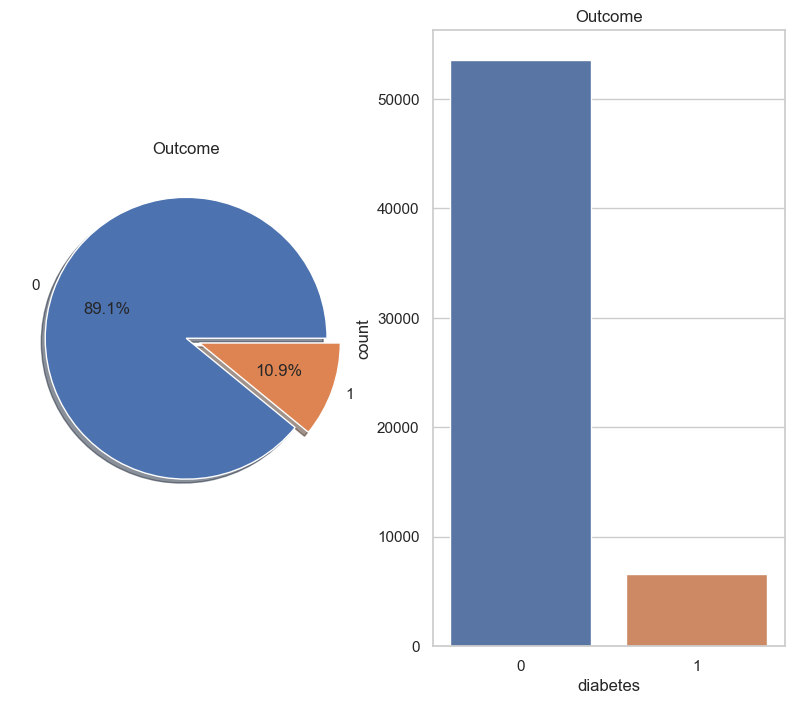

In [75]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(10,8))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x ='diabetes', data = df, ax=ax[1])
ax[1].set_title('Outcome')
# Show the plot
plt.show()

In [50]:
df[['gender','diabetes']]

,gender,diabetes
0,Female,0
1,Male,0
2,Female,0
3,Male,0
4,Female,0
...,...,...
60175,Female,0
60176,Female,0
60177,Male,0
60178,Female,0


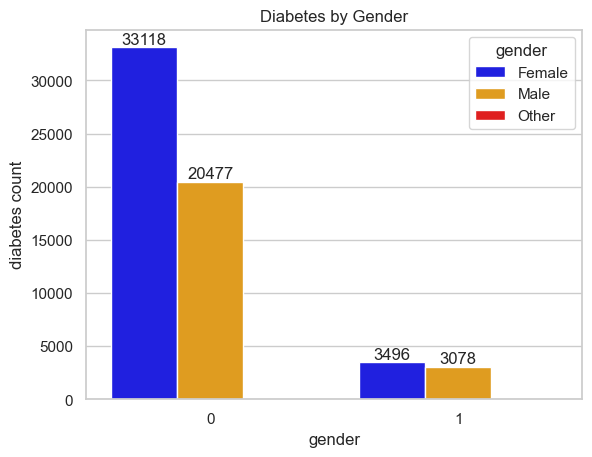

In [69]:
#Plotting a barchart between gender and diabetes
ax=sns.countplot(df,x='diabetes',hue='gender',palette=['Blue','Orange','red'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('gender')
plt.ylabel('diabetes count')
plt.title('Diabetes by Gender')
plt.show()

[Text(0, 0, '3346'), Text(0, 0, '948'), Text(0, 0, '2280')]

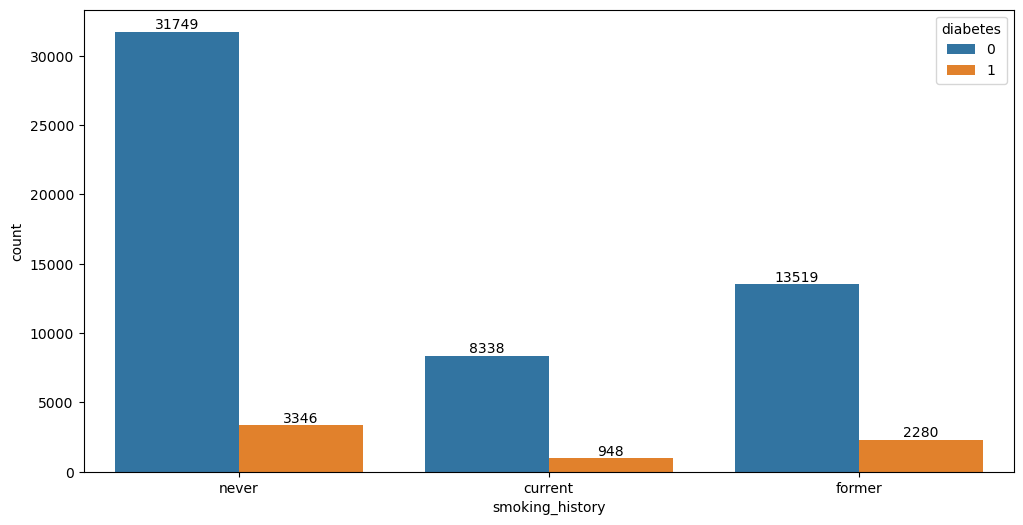

In [52]:
#plotting a graph to display the probability of diabetes occurence with smoking history
plt.figure(figsize=(12,6))
ax=sns.countplot(df,x='smoking_history',hue='diabetes')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

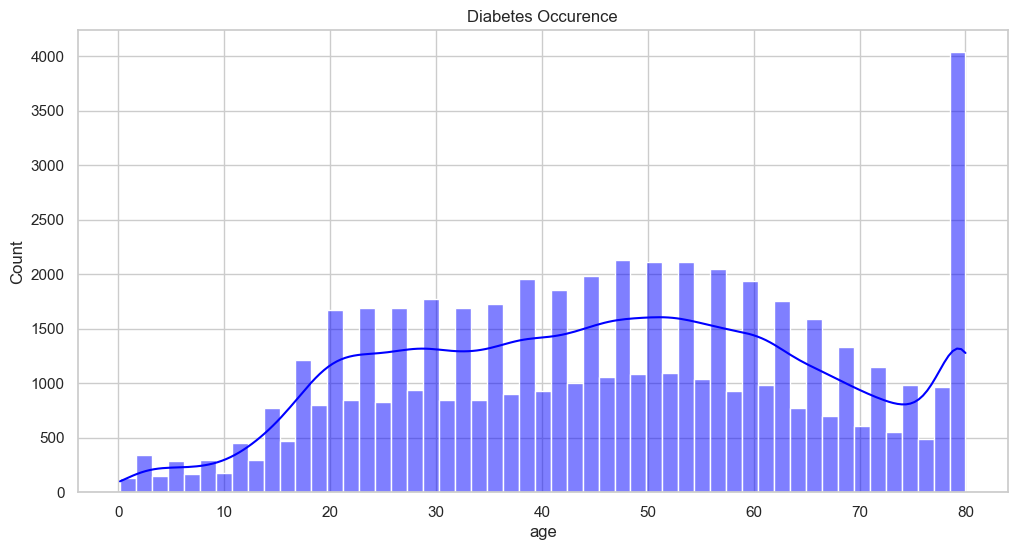

In [71]:
#plotting a histogram to display the probability of diabetes occurence with age
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.histplot(df,x='age', color = 'Blue',kde = True,)
plt.title('Diabetes Occurence')
plt.show()

<Axes: xlabel='HbA1c_level'>

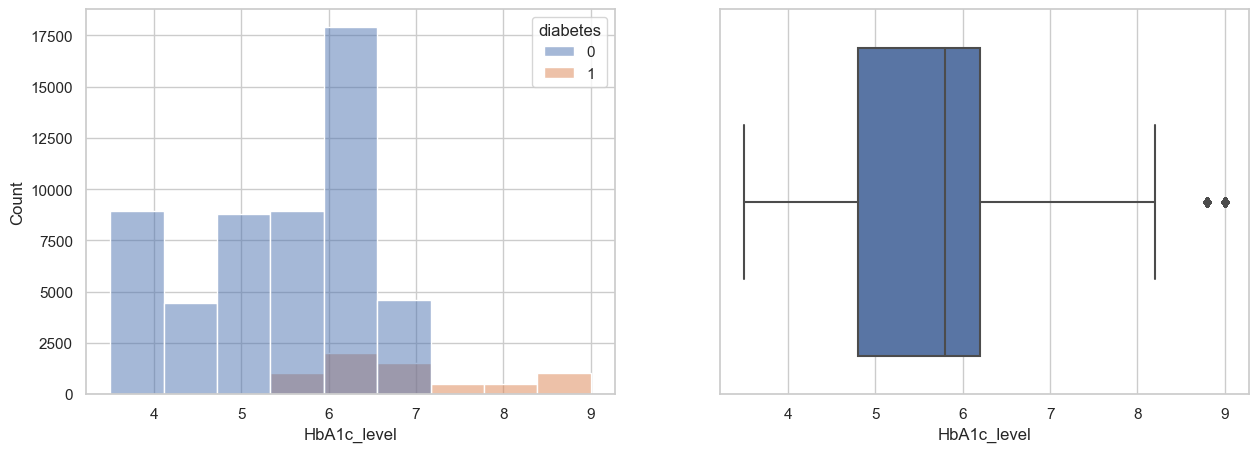

In [64]:
#plotting a histogram and a box graph
fig, axes = plt.subplots(1,2, figsize=(15,5),squeeze=False)

sns.histplot(df,x='HbA1c_level',hue='diabetes',bins= 9,ax=axes[0,0])
sns.boxplot(df,x='HbA1c_level',ax=axes[0,1])

<Axes: xlabel='blood_glucose_level'>

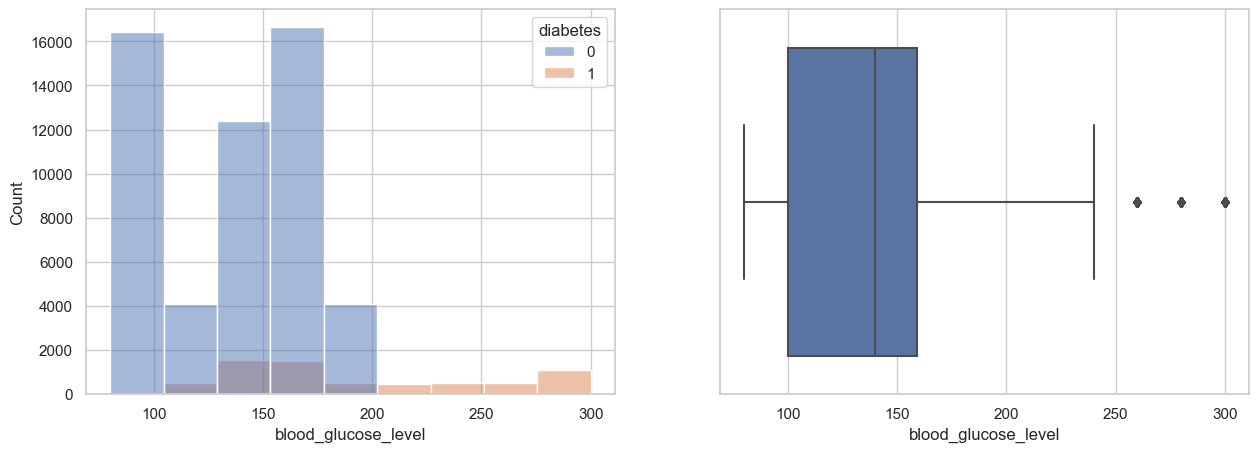

In [66]:
#plotting a histogram and a box graph
fig, axes = plt.subplots(1,2, figsize=(15,5),squeeze=False)

sns.histplot(df,x='blood_glucose_level',hue='diabetes',bins= 9,ax=axes[0,0])
sns.boxplot(df,x='blood_glucose_level',ax=axes[0,1])

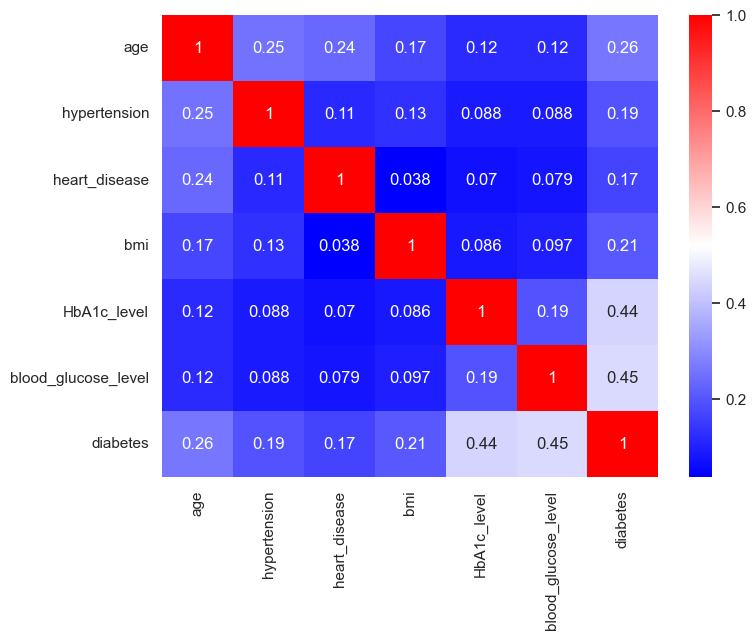

In [65]:
#Correlation analysis using Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='bwr',annot = True)
plt.show()

Analysis : We can see strong relationship between age , HBA1c , blood_glocuse_level factors and diabeties.

# Feature Selection

In [77]:
df = pd.get_dummies(df)

In [78]:
#lets extract features and targets
X = df.drop(columns=['diabetes'])
Y = df['diabetes']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


# Feature Importance

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[1.24803072e-01 2.32009823e-02 1.59030747e-02 1.43617914e-01
 3.61253925e-01 3.21546134e-01 1.69401061e-03 1.86907416e-03
 3.63850047e-06 1.53437770e-03 2.50015834e-03 2.07363964e-03]


# Splitting Dataset

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Using Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.9449152542372882


In [82]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[10566   168]
 [  495   807]]


# Using KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9363575938850116


# Using SVC

In [85]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.9317879694250581


# Using Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9423396477234962


# Using GaussianNB

In [87]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.8651545363908275


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.963193752077102


# Results

In [92]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.9449,0.9363,0.9317,0.9423,0.8651, 0.9631]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                      Model
Score                      
0.9631        Random Forest
0.9449  Logistic Regression
0.9423        Decision Tree
0.9363                  KNN
0.9317                  SVC
0.8651           GaussianNB


In [ ]:
#Hence I will use Random Forecast algorithm for training my model.